In [1]:
import sys
sys.path.append("../src")

import pandas as pd

from setups import Dataset, Sample, Model
sample = Sample("full", Dataset("cadec"))

In [2]:
# Load entity texts
words = sample.load("words")
comprises = sample.load("comprises")
entity_texts = words.merge(comprises, on=["doc_id", "word_id"]) \
    .sort_values(["doc_id", "word_id"]) \
    .groupby(["doc_id", "sentence_id", "entity_id"])["word_text"].apply(list).apply(" ".join)

# Generate a random sample of entities
SEED = 16
sampled = entity_texts.sample(n=1500, random_state=16)

In [3]:
# Sample representativeness
all_attributes = sample.load("entity_attributes", depth="individual")
sample_attributes = sampled.to_frame().join(all_attributes).drop(columns="word_text")
assert all(all_attributes.columns == sample_attributes.columns)

all_attributes["sample"] = "population"
sample_attributes["sample"] = "sampled"

full = pd.concat([all_attributes, sample_attributes], axis="index")

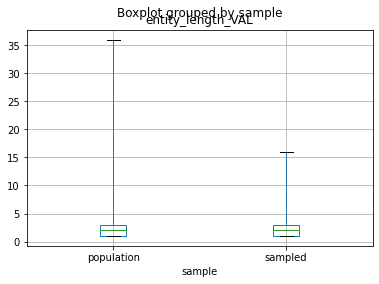

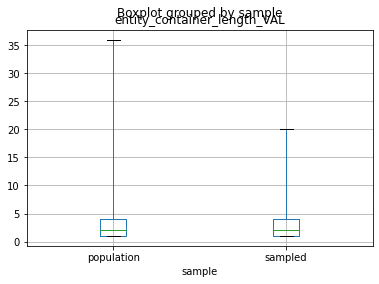

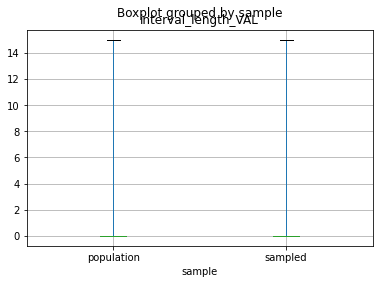

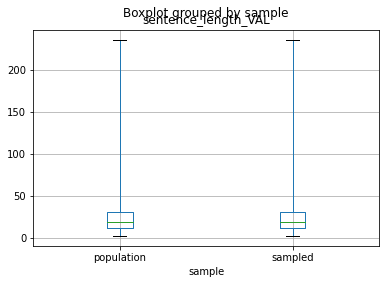

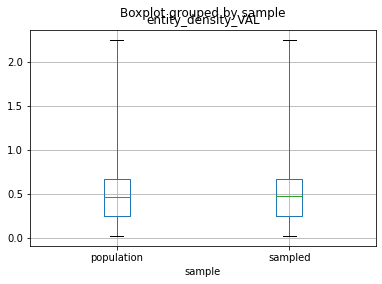

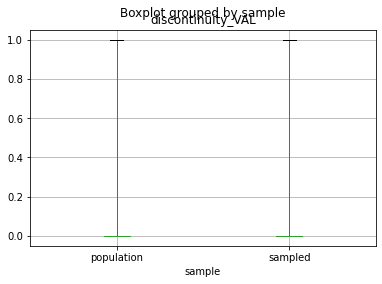

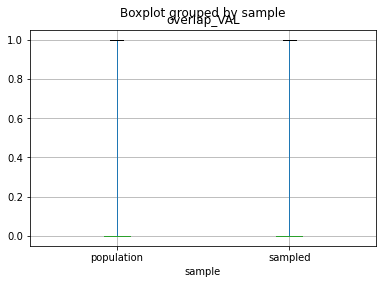

In [43]:
full["discontinuity_VAL"] = 0
full.loc[full["discontinuity"] == "discontinuous", "discontinuity_VAL"] = 1

full["overlap_VAL"] = 1
full.loc[full["overlap_location"] == "none", "overlap_VAL"] = 0

for c in full.columns:
    if "_VAL" in c:
        boxplot = full.boxplot(column=c,
                               by="sample",
                               whis=(0, 100),
                              )

In [61]:
N = 10
VIEW = 30
[i for i in sampled[N*VIEW:(N+1)*VIEW].items()]

[(('LIPITOR.174', 'LIPITOR.174-4', 1), 'joint pain'),
 (('LIPITOR.441', 'LIPITOR.441-0', 2), 'extreme pain in thigh muscles'),
 (('LIPITOR.92', 'LIPITOR.92-0', 3), 'weakness in upper back'),
 (('LIPITOR.113', 'LIPITOR.113-1', 0), 'frozen shoulder'),
 (('LIPITOR.530', 'LIPITOR.530-0', 1), 'stiffness similar to arthritis'),
 (('LIPITOR.603', 'LIPITOR.603-5', 6), 'clumsiness'),
 (('LIPITOR.335', 'LIPITOR.335-1', 1), 'Severe knee pain'),
 (('LIPITOR.362', 'LIPITOR.362-1', 2), 'VERTIGO'),
 (('LIPITOR.253', 'LIPITOR.253-0', 2), 'cramps'),
 (('LIPITOR.283', 'LIPITOR.283-0', 0), 'tighening of the chest'),
 (('LIPITOR.872', 'LIPITOR.872-1', 7), 'tremor'),
 (('LIPITOR.920', 'LIPITOR.920-1', 2), 'liver enzymes sky - high'),
 (('LIPITOR.452', 'LIPITOR.452-0', 0), 'Calf Pain'),
 (('ARTHROTEC.13', 'ARTHROTEC.13-0', 0), 'gastritis'),
 (('LIPITOR.11', 'LIPITOR.11-10', 1), 'muscle aches in my neck'),
 (('LIPITOR.163', 'LIPITOR.163-0', 3), 'stiffness'),
 (('LIPITOR.593', 'LIPITOR.593-1', 1), 'leg pain')

In [13]:
sentence_texts = words.groupby(["doc_id", "sentence_id"])["word_text"].apply(list).apply(" ".join)

In [30]:
sentence_texts[sentence_texts.index == ('LIPITOR.972', 'LIPITOR.972-8')].iloc[0]

'My father could not speak for himself as his form of brain cancer was so aggressive that he went from a totally normal guy walking with a cane from initial neurological damage at inital dx for brain cancer to bedridden , unable to speak , feed himself , do anything for himself in 10 days .'

In [63]:
# Figurative language (expected in all other categories)
figl = [
    (('LIPITOR.858', 'LIPITOR.858-2', 5), 'my gait was like someone who could barely walk'),
    (('LIPITOR.873', 'LIPITOR.873-0', 4), 'zombie like doped up state'),
    (('LIPITOR.97', 'LIPITOR.97-4', 13), 'got lost on way'),
    (('ARTHROTEC.41', 'ARTHROTEC.41-0', 11), 'feel like a bubble of air is stuck in my chest'),
]

# Includes intermediate words
conj = [
    (('LIPITOR.619', 'LIPITOR.619-4', 5), 'extremely limits the use of my arms'),
    (('LIPITOR.786', 'LIPITOR.786-3', 1), 'right knee is so painful'),
    (('LIPITOR.220', 'LIPITOR.220-0', 5), 'muscle spasams in face and neck'),
    (('LIPITOR.273', 'LIPITOR.273-8', 17), 'pain in every tendon in my body'),
    (('LIPITOR.446', 'LIPITOR.446-2', 1), 'vision close up is blurry'),
    (('LIPITOR.823', 'LIPITOR.823-1', 1), 'Legs feel swollen'),
    (('LIPITOR.136', 'LIPITOR.136-0', 2), 'pain of the hip joint'),
    (('LIPITOR.452', 'LIPITOR.452-1', 1), 'Calves tire and burn'),
    (('LIPITOR.840', 'LIPITOR.840-4', 10), 'numbness in my hands'),
    (('LIPITOR.810', 'LIPITOR.810-0', 1), 'inability to pull myself from bed'),
    (('LIPITOR.500', 'LIPITOR.500-3', 5), 'feet is painful'),
    (('LIPITOR.946', 'LIPITOR.946-0', 0), 'Aches and pain from head to toe'),
    (('LIPITOR.359', 'LIPITOR.359-1', 1), 'increase my heart rate'),
    (('LIPITOR.656', 'LIPITOR.656-1', 3), 'swallowing so bad'),
    (('LIPITOR.43', 'LIPITOR.43-0', 0), 'pain all over my body'),
    (('LIPITOR.840', 'LIPITOR.840-2', 5), 'cramping in my lower legs'),
    (('LIPITOR.840', 'LIPITOR.840-3', 7), 'Numbness in all of my toes'),
    (('LIPITOR.835', 'LIPITOR.835-0', 0), 'muscular pain in the back'),
    (('LIPITOR.400', 'LIPITOR.400-3', 8), 'tendonitis in my shoulders'),
    (('LIPITOR.75', 'LIPITOR.75-7', 0), 'pains in my back'),
    (('LIPITOR.554', 'LIPITOR.554-0', 1), 'numbing of my feet'),
    (('LIPITOR.581', 'LIPITOR.581-3', 3), 'permanent damage to my muscles'),
    (('ARTHROTEC.7', 'ARTHROTEC.7-0', 0),
  'severe sudden onset headache in the back of head'),
    (('ARTHROTEC.20', 'ARTHROTEC.20-6', 5), 'brought my period on'),
    (('LIPITOR.553', 'LIPITOR.553-1', 2), 'muscle pain in the legs'),
    (('LIPITOR.259', 'LIPITOR.259-3', 3), 'damage to my muscles'),
    (('LIPITOR.283', 'LIPITOR.283-0', 0), 'tighening of the chest'),
    (('LIPITOR.11', 'LIPITOR.11-10', 1), 'muscle aches in my neck'),
     (('LIPITOR.687', 'LIPITOR.687-11', 4),
  'losing the feeling in his right hand'),
]

# Includes extra text (e.g. explanation)
extr = [
 (('LIPITOR.849', 'LIPITOR.849-2', 5), 'exhausted all the time'),
    (('LIPITOR.273', 'LIPITOR.273-8', 17), 'pain in every tendon in my body'),
(('LIPITOR.12', 'LIPITOR.12-0', 5),
  'difficulty getting out of bed in the morning'),
    (('LIPITOR.446', 'LIPITOR.446-2', 1), 'vision close up is blurry'),
    (('LIPITOR.945', 'LIPITOR.945-0', 1), 'no energy all day'),
    (('LIPITOR.742', 'LIPITOR.742-1', 1), 'Extreme pain in upper back area'),
    (('LIPITOR.671', 'LIPITOR.671-5', 8), 'Deeper muscle twitches on arms sides'),
    (('ARTHROTEC.9', 'ARTHROTEC.9-4', 0), 'EXTREME nausea'),
    (('LIPITOR.405', 'LIPITOR.405-0', 2), 'numbness in both legs'),
    (('LIPITOR.946', 'LIPITOR.946-0', 1), 'very grouchy'),
    (('LIPITOR.785', 'LIPITOR.785-6', 1), 'disabling fatigue'),
    (('LIPITOR.640', 'LIPITOR.640-0', 1), 'hert from head to my toe'),
    (('LIPITOR.643', 'LIPITOR.643-0', 6), 'ankles ache so bad'),
    (('LIPITOR.31', 'LIPITOR.31-0', 1), 'UNBEARABLE MUSCLE PAIN'),
    (('LIPITOR.295', 'LIPITOR.295-0', 0), 'Terrible short term memory problems'),
    (('LIPITOR.946', 'LIPITOR.946-0', 0), 'Aches and pain from head to toe'),
    (('LIPITOR.254', 'LIPITOR.254-2', 7), 'waking me up at night in pain'),
    (('LIPITOR.515', 'LIPITOR.515-0', 0), 'muscles tire very quickly'),
    (('LIPITOR.935', 'LIPITOR.935-1', 6), 'muscles of whole body dilution in size'),
    (('LIPITOR.43', 'LIPITOR.43-0', 0), 'pain all over my body'),
    (('LIPITOR.935', 'LIPITOR.935-1', 12), 'lungs detoriation like less intake of oxigen'),
    (('LIPITOR.996', 'LIPITOR.996-0', 0), 'unexplained cough'),
    (('LIPITOR.943', 'LIPITOR.943-0', 2), 'pains all over body'),
    (('LIPITOR.840', 'LIPITOR.840-3', 7), 'Numbness in all of my toes'),
    (('LIPITOR.617', 'LIPITOR.617-7', 6), 'weird symptoms ( eg . popping ) in knee'),
    (('LIPITOR.574', 'LIPITOR.574-1', 5), 'general feeling of weakness'),
    (('LIPITOR.927', 'LIPITOR.927-0', 3), 'persistent pain in calf'),
    (('LIPITOR.97', 'LIPITOR.97-2', 11), 'inability to think fast enough'),
    (('LIPITOR.352', 'LIPITOR.352-0', 0), 'very painful muscle aches back'),
    (('LIPITOR.367', 'LIPITOR.367-0', 0), 'intense dizziness'),
    (('LIPITOR.310', 'LIPITOR.310-1', 0), 'Extreme headaches'),
    (('LIPITOR.723', 'LIPITOR.723-2', 5), 'Big time flatulence'),
    (('LIPITOR.581', 'LIPITOR.581-3', 3), 'permanent damage to my muscles'),
    (('ARTHROTEC.7', 'ARTHROTEC.7-0', 0),
  'severe sudden onset headache in the back of head'),
    (('LIPITOR.535', 'LIPITOR.535-1', 6), 'persistent feeling of tiredness'),
    (('LIPITOR.425', 'LIPITOR.425-0', 0), 'Severe neck pain'),
    (('ARTHROTEC.37', 'ARTHROTEC.37-2', 2), 'severe cramping'),
    (('ARTHROTEC.68', 'ARTHROTEC.68-0', 0), 'light nausea'),
    (('LIPITOR.629', 'LIPITOR.629-3', 1), 'wicked back pain'),
    (('LIPITOR.441', 'LIPITOR.441-0', 2), 'extreme pain in thigh muscles'),
    (('LIPITOR.530', 'LIPITOR.530-0', 1), 'stiffness similar to arthritis'),
    (('LIPITOR.335', 'LIPITOR.335-1', 1), 'Severe knee pain'),
    (('LIPITOR.460', 'LIPITOR.460-1', 7), 'extreme fatigue'),
]

# Non-keyword phrases
nonk = [
    (('LIPITOR.254', 'LIPITOR.254-2', 7), 'waking me up at night in pain'),
    (('LIPITOR.619', 'LIPITOR.619-4', 5), 'extremely limits the use of my arms'),
 (('LIPITOR.67', 'LIPITOR.67-4', 4), 'can not sleep'),
    (('LIPITOR.12', 'LIPITOR.12-0', 5),
  'difficulty getting out of bed in the morning'),
    (('LIPITOR.945', 'LIPITOR.945-0', 1), 'no energy all day'),
    (('LIPITOR.399', 'LIPITOR.399-6', 7), 'could not walk up the stairs'),
    (('LIPITOR.898', 'LIPITOR.898-1', 2), 'hard time walking'),
    (('LIPITOR.972', 'LIPITOR.972-8', 7), 'unable to feed himself'),
    (('LIPITOR.946', 'LIPITOR.946-0', 1), 'very grouchy'),
    (('LIPITOR.543', 'LIPITOR.543-0', 5), 'not concentrating well'),
    (('LIPITOR.323', 'LIPITOR.323-2', 7), 'spaced - out feeling'),
    (('LIPITOR.810', 'LIPITOR.810-0', 1), 'inability to pull myself from bed'),
    (('LIPITOR.465', 'LIPITOR.465-7', 10), 'painful to walk'),
    (('LIPITOR.56', 'LIPITOR.56-2', 4), 'could not raise my arms'),
    (('LIPITOR.617', 'LIPITOR.617-7', 6), 'weird symptoms ( eg . popping ) in knee'),
    (('LIPITOR.97', 'LIPITOR.97-2', 11), 'inability to think fast enough'),
    (('LIPITOR.194', 'LIPITOR.194-3', 13), "couldn ' t walk"),
    (('LIPITOR.170', 'LIPITOR.170-0', 3), 'could not walk'),
    (('LIPITOR.500', 'LIPITOR.500-4', 6), 'Difficult to keep balance'),
    (('ARTHROTEC.20', 'ARTHROTEC.20-6', 5), 'brought my period on'),
    (('LIPITOR.760', 'LIPITOR.760-0', 1), 'foot turned at right angle'),
    (('LIPITOR.320', 'LIPITOR.320-1', 2), 'not be able to process thoughts'),
    (('LIPITOR.113', 'LIPITOR.113-1', 0), 'frozen shoulder'),
    (('LIPITOR.920', 'LIPITOR.920-1', 2), 'liver enzymes sky - high'),
     (('LIPITOR.687', 'LIPITOR.687-11', 4), 'losing the feeling in his right hand'),
     (('LIPITOR.56', 'LIPITOR.56-2', 1), 'Frozen Shoulder'),
]

In [135]:
#attrs = sample.load("entity_attributes", depth="individual")
attrs = pd.concat([sample.load("fold_entity_attributes", depth="individual", fold=0) for fold in range(10)], axis="index")
all_attrs = attrs[attrs.index.isin(sampled[0*VIEW:(N+1)*VIEW].index)]
all_attrs["fuzzy"] = "non-fuzzy"

for ln, l in {"figl": figl, "nonk": nonk, "extr": extr, "conj": conj}.items():
    all_attrs.loc[all_attrs.index.isin([t[0] for t in l]), "fuzzy"] = ln

/tmp/ipykernel_21194/2438141298.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_attrs["fuzzy"] = "non-fuzzy"
/home/s3386473/.conda/envs/lit-repl-dirkson21/lib/python3.9/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [136]:
all_attrs.columns

Index(['oov_density_VAL', 'oov_density', 'token_frequency_mean_VAL',
       'token_frequency_median_VAL', 'token_consistency_mean_VAL',
       'token_consistency_median_VAL', 'entity_frequency_VAL',
       'token_frequency_mean', 'token_frequency_median', 'entity_frequency',
       'token_consistency_mean', 'token_consistency_median', 'fuzzy'],
      dtype='object')

In [137]:
all_attrs.groupby(["fuzzy"]).mean() * 100

oov_density_VAL  token_frequency_mean_VAL  \
fuzzy                                                  
conj              0.041667                  0.008067   
extr              0.024691                  0.003130   
figl              0.181818                  0.007567   
non-fuzzy         0.040881                  0.002266   
nonk              0.100000                  0.001491   

           token_frequency_median_VAL  token_consistency_mean_VAL  \
fuzzy                                                               
conj                         0.003463                    0.477914   
extr                         0.001621                    0.562062   
figl                         0.005958                    0.275080   
non-fuzzy                    0.002026                    0.803248   
nonk                         0.000999                    0.326657   

           token_consistency_median_VAL  entity_frequency_VAL  
fuzzy                                                          
conj                           0.426110              0.000000  
extr                           0.536672              0.000243  
figl                           0.187097              0.000000  
non-fuzzy                      0.825258              0.003068  
nonk                           0.305060              0.000199

In [129]:
all_attrs.groupby(["fuzzy", "token_frequency_mean"]).apply(len)

fuzzy      token_frequency_mean
fuzzy      L                        20
           XL                       70
non-fuzzy  XS                       50
           S                       210
           L                       160
           XL                      180
dtype: int64